In [1]:
### Data Collection
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import numpy
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [2]:
df = yf.Ticker('SBIN.NS').history(start="2001-01-01", end="2023-07-18")
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2001-01-01 00:00:00+05:30,13.099957,13.387609,12.934136,13.198098,11237186,0.0,0.0
1,2001-01-02 00:00:00+05:30,13.374070,14.145651,13.208248,13.929067,21367159,0.0,0.0
2,2001-01-03 00:00:00+05:30,13.942603,14.920614,13.881688,14.707415,59167521,0.0,0.0
3,2001-01-04 00:00:00+05:30,14.781865,14.957840,14.162570,14.392691,29457229,0.0,0.0
4,2001-01-05 00:00:00+05:30,14.396073,14.781863,14.257323,14.548358,29628333,0.0,0.0


In [3]:
df1=df.reset_index()['Close']
df1

0        13.198098
1        13.929067
2        14.707415
3        14.392691
4        14.548358
           ...    
5614    588.549988
5615    589.250000
5616    585.650024
5617    584.400024
5618    601.099976
Name: Close, Length: 5619, dtype: float64

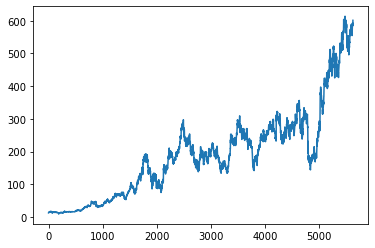

In [4]:
plt.plot(df1)

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.00562865]
 [0.00683931]
 [0.00812844]
 ...
 [0.95374677]
 [0.95167647]
 [0.97933561]]


In [6]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [7]:
training_size,test_size

(3652, 1967)

In [8]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [9]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
print(X_train.shape), print(y_train.shape)

(3551, 100)
(3551,)


(None, None)

In [11]:
print(X_test.shape), print(ytest.shape)

(1866, 100)
(1866,)


(None, None)

In [12]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
56/56 [==============================] - 11s 129ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 2/100
56/56 [==============================] - 7s 118ms/step - loss: 2.9565e-04 - val_loss: 0.0027
Epoch 3/100
56/56 [==============================] - 8s 142ms/step - loss: 2.7282e-04 - val_loss: 0.0027
Epoch 4/100
56/56 [==============================] - 7s 121ms/step - loss: 2.5726e-04 - val_loss: 0.0026
Epoch 5/100
56/56 [==============================] - 7s 121ms/step - loss: 2.4137e-04 - val_loss: 0.0021
Epoch 6/100
56/56 [==============================] - 7s 125ms/step - loss: 2.2882e-04 - val_loss: 0.0020
Epoch 7/100
56/56 [==============================] - 7s 118ms/step - loss: 2.1735e-04 - val_loss: 0.0025
Epoch 8/100
56/56 [==============================] - 7s 134ms/step - loss: 2.0458e-04 - val_loss: 0.0019
Epoch 9/100
56/56 [==============================] - 7s 131ms/step - loss: 1.8692e-04 - val_loss: 0.0015
Epoch 10/100
56/56 [==============================] - 7s 1

In [17]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

59/59 [==============================] - 1s 21ms/step


In [18]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [19]:
math.sqrt(mean_squared_error(y_train,train_predict))

147.42182699845876

In [20]:
math.sqrt(mean_squared_error(ytest,test_predict))

346.25751153522566

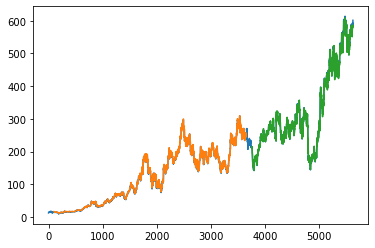

In [21]:
# Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [22]:
len(test_data)

1967

In [23]:
x_input=test_data[(len(test_data)-100):].reshape(1,-1)
x_input.shape


(1, 100)

In [24]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [25]:
temp_input[:30]

[0.8464688010271416,
 0.836964523368827,
 0.8342025723357329,
 0.8226673175086204,
 0.8302220451102506,
 0.8303032700445558,
 0.8411073488295642,
 0.8331464965564073,
 0.8557293533380882,
 0.8509366273140042,
 0.8955338168816804,
 0.896346167313638,
 0.9013825175961862,
 0.8917970655480181,
 0.873032033400949,
 0.8448441001632265,
 0.8373705974959018,
 0.824616918109757,
 0.8359084475895013,
 0.8445190993371011,
 0.8272976947529976,
 0.8316029700823456,
 0.8311156204765134,
 0.8168185662496628,
 0.8047960123611702,
 0.8125944147657163,
 0.8092638386480328,
 0.8229110428559885,
 0.834689921941565,
 0.8395639234444064]

In [26]:
# demonstrate prediction for next 10 days

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.98032206]
101
1 day input [0.83696452 0.83420257 0.82266732 0.83022205 0.83030327 0.84110735
 0.8331465  0.85572935 0.85093663 0.89553382 0.89634617 0.90138252
 0.89179707 0.87303203 0.8448441  0.8373706  0.82461692 0.83590845
 0.8445191  0.82729769 0.83160297 0.83111562 0.81681857 0.80479601
 0.81259441 0.80926384 0.82291104 0.83468992 0.83956392 0.8334714
 0.84102617 0.83883275 0.84825585 0.8419197  0.84963693 0.86758941
 0.87059508 0.86157816 0.86888921 0.86620853 0.88481091 0.89650852
 0.90390074 0.90130134 0.92331557 0.91844157 0.91064317 0.92607753
 0.92039117 0.93192633 0.91551717 0.91340512 0.915436   0.92307195
 0.92916448 0.93631298 0.93631298 0.91665452 0.91819795 0.92144725
 0.92867693 0.93046418 0.9281084  0.93582553 0.95044753 0.94687333
 0.9441405  0.94894363 0.95631392 0.95631392 0.95324982 0.95962641
 0.95846702 0.94223588 0.94215309 0.93842655 0.93867492 0.92202972
 0.92989687 0.92592185 0.92352038 0.92178125 0.91615009 0.90232042
 0.90637823 0.92136719 0.92136719 

In [27]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [28]:
len(df1)

5619

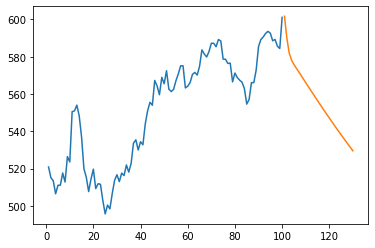

In [29]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

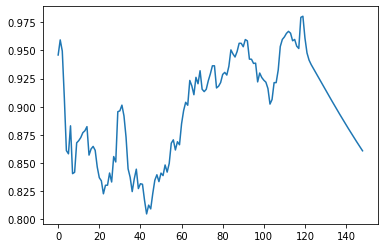

In [30]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[5500:])

In [31]:
df3=scaler.inverse_transform(df3).tolist()

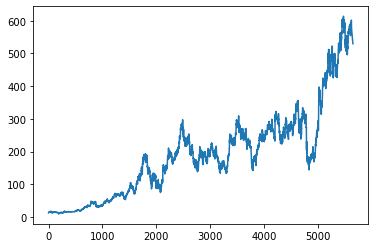

In [32]:
plt.plot(df3)